# <font color=#025dfa> Kredi Kartı Kümelemesi/Credit Card Clustering

TR = Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı.
 
EN = Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

Kaynak/Source = https://thecleverprogrammer.com/2022/10/03/credit-card-clustering-with-machine-learning/

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from langdetect import detect
from googletrans import Translator

In [2]:
pd.set_option("display.max_columns",None) 
# TR = En fazla kaç sütun olduğunu gösteriyor. 
# EN = It shows the maximum number of columns.

In [3]:
df=pd.read_csv('CC GENERAL.csv')

## <font color=#FFD700> EDA Keşif Amaçlı Veri Analizi - EDA - Exploratory Data Analysis 

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3350,C13446,686.657879,1.000000,2476.45,1624.50,851.95,253.273353,1.000000,0.750000,1.000000,0.083333,1,35,4000.0,1600.734366,224.265608,0.083333,12
1257,C11301,139.511394,1.000000,1247.75,137.84,1109.91,404.441902,1.000000,0.166667,1.000000,0.166667,2,31,5000.0,2017.650301,185.221234,0.500000,12
8905,C19146,32.669762,0.571429,340.00,0.00,340.00,0.000000,0.571429,0.000000,0.428571,0.000000,0,8,1000.0,465.400577,80.708132,1.000000,7
2251,C12321,21.311946,0.727273,3618.19,2804.79,813.40,0.000000,1.000000,1.000000,0.500000,0.000000,0,40,15000.0,3570.597218,53.628070,1.000000,12
6041,C16212,281.079293,1.000000,4723.84,185.00,4538.84,0.000000,1.000000,0.083333,1.000000,0.000000,0,31,7500.0,4319.450171,170.895638,1.000000,12


In [6]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [7]:
df.shape

(8950, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## <font color='#8b1cc7'> Sütün İşimlerini Orjinal, Türkçe Ve İngilizce Versiyonda Göster  - Show the Processes of Milk in Original, Turkish and English Version

In [12]:
common_abbreviations = {
    '':'',						
}
# TR = Kısaltmaların orjinal versiyonunu tanımladık
# EN = We defined the original version of the abbreviations

def expand_abbreviations(text, abbreviations):
    for abbr, full in abbreviations.items():
        text = re.sub(r'\b{}\b'.format(abbr), full, text)
    return text
# TR = Kısaltmaları tanıyan ve tam hallerine dönüştüren fonksiyon
# EN = Function that recognizes abbreviations and converts them to their full form


def translate_text(text, dest_lang):
    translator = Translator()
    translation = translator.translate(text, dest=dest_lang)
    return translation.text
# TR = Çeviri işlemi için fonksiyon
# EN = Function for translation process

columns = df.columns # kısaltma yoksa columns=[] bu şekilde
rows = []

for col in columns:
    expanded_col = expand_abbreviations(col, common_abbreviations)
    try:
        language = detect(expanded_col)
    except:
        language = "unknown"
    
    if language == 'en':
        english_translation = expanded_col
        turkish_translation = translate_text(expanded_col, 'tr')
        row = [english_translation, turkish_translation]
        column_names = ['English', 'Türkçe']
    elif language == 'tr':
        turkish_translation = expanded_col
        english_translation = translate_text(expanded_col, 'en')
        row = [turkish_translation, english_translation]
        column_names = ['Türkçe', 'English']
    else:
        original_translation = expanded_col
        turkish_translation = translate_text(expanded_col, 'tr')
        english_translation = translate_text(expanded_col, 'en')
        row = [original_translation, turkish_translation, english_translation]
        column_names = ['Orjinal/Original', 'Türkçe', 'English']
    
    rows.append(row)


result_df = pd.DataFrame(rows, columns=column_names)
# TR = Yeni bir DataFrame oluşturduk
# EN = We created a new DataFrame

result_df = result_df.T
# TR = Satır ve sütunları çevir
# EN = Translate rows and columns

result_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Orjinal/Original,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Türkçe,Cust_id,DENGE,Balance_frequency,Alımlar,Onoff_purchases,Seconsments_purchases,NAKİT AVANS,Satın alımlar_frekans,Onoff_purchases_frequency,Satın alımlar_installments_frequency,Cash_advance_frekans,Cash_advance_trx,Satın alımlar_trx,KREDİ LİMİTİ,Ödemeler,Minimum_payments,Prc_full_payment,Görev süresi
English,None,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,None,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,None,CASH_ADVANCE_TRX,PURCHASES_TRX,None,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


## <font color=#1cfc03> Aykırı Değer - Outlier

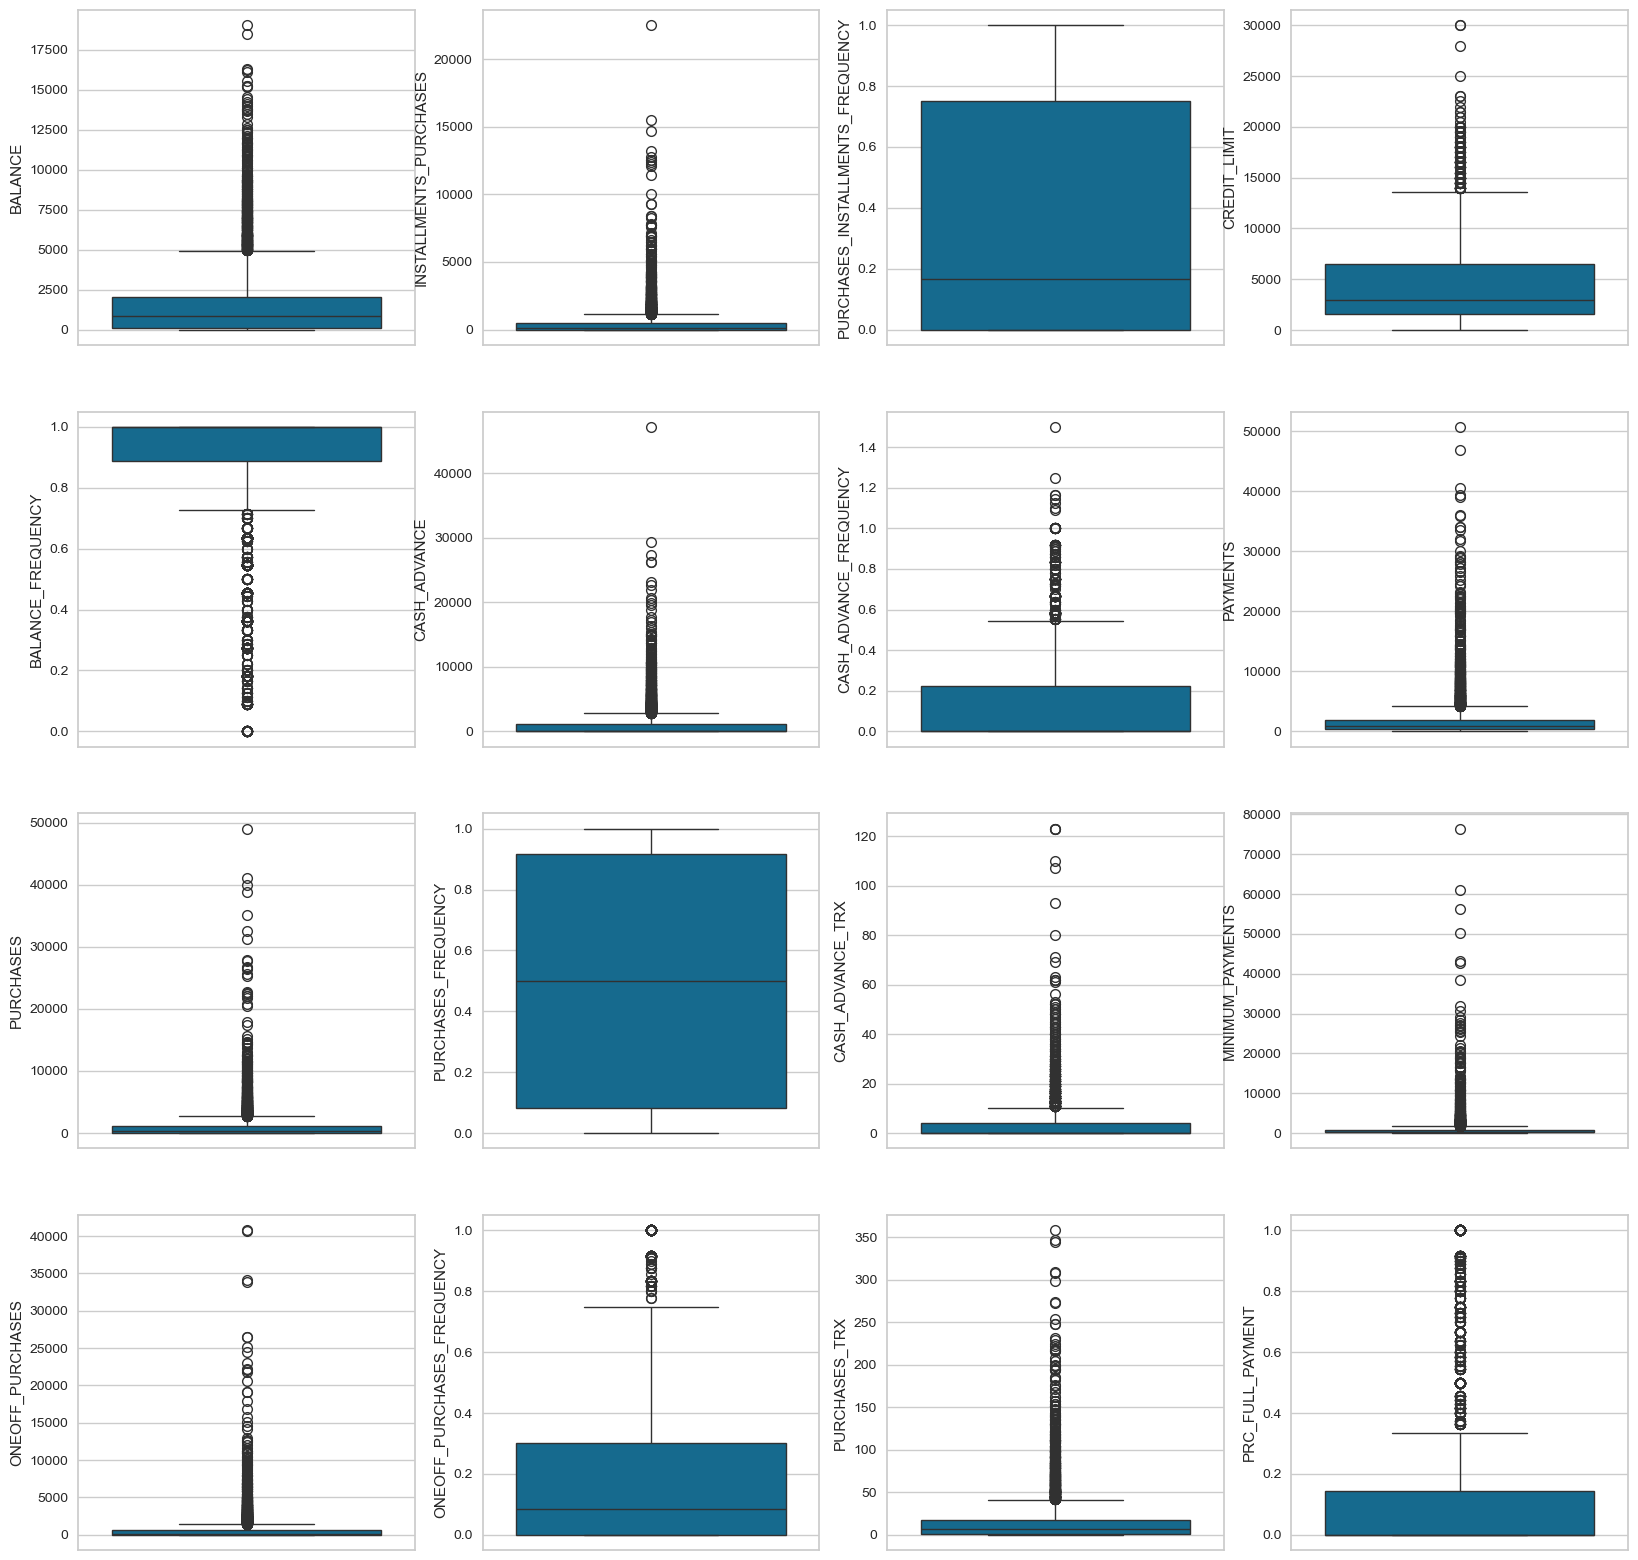

In [17]:
fig, ax2=plt.subplots(4,4,figsize=(20,20)) 
# TR = Subplot çoklu tablo oluşturuyor. a yerine kaç tane satır ve sütün olması gerektiğini yazacağız. 
# EN = Subplot creates multiple tables. Instead of a, we will write how many rows and columns there should be

sns.boxplot(df['BALANCE'],ax=ax2[0][0])
sns.boxplot(df['BALANCE_FREQUENCY'],ax=ax2[1][0])
sns.boxplot(df['PURCHASES'],ax=ax2[2][0])
sns.boxplot(df['ONEOFF_PURCHASES'],ax=ax2[3][0])
sns.boxplot(df['INSTALLMENTS_PURCHASES'],ax=ax2[0][1])
sns.boxplot(df['CASH_ADVANCE'],ax=ax2[1][1])
sns.boxplot(df['PURCHASES_FREQUENCY'],ax=ax2[2][1])
sns.boxplot(df['ONEOFF_PURCHASES_FREQUENCY'],ax=ax2[3][1])
sns.boxplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'],ax=ax2[0][2])
sns.boxplot(df['CASH_ADVANCE_FREQUENCY'],ax=ax2[1][2])
sns.boxplot(df['CASH_ADVANCE_TRX'],ax=ax2[2][2])
sns.boxplot(df['PURCHASES_TRX'],ax=ax2[3][2])
sns.boxplot(df['CREDIT_LIMIT'],ax=ax2[0][3])
sns.boxplot(df['PAYMENTS'],ax=ax2[1][3])
sns.boxplot(df['MINIMUM_PAYMENTS'],ax=ax2[2][3])
sns.boxplot(df['PRC_FULL_PAYMENT'],ax=ax2[3][3]);
# TR = ax2 sonrası ([x][y]) yazı [x] ekseninde kaçıncı sırada,[y] ekseninde kaçıncı sırada olacağını belirtiyor.
# EN = The text after ax2 ([x][y]) indicates the rank on the [x] axis and the rank on the [y] axis.

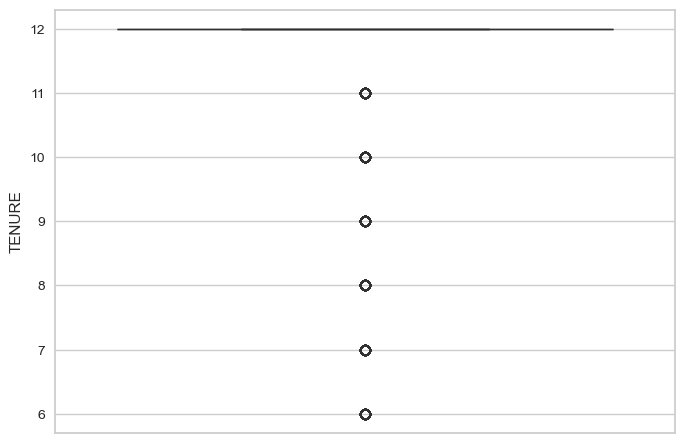

In [18]:
sns.boxplot(df['TENURE']);

TR = Verilerimizin çok büyük bir kısmı aykırı değer olduğu için herhangi bir işlem yapmıyoruz.

EN = Since a large portion of our data is an outlier, we do not take any action.

## <font color='#ff4d00'> Boşluk Varsa Doldurmaya, Düzeltilecek Kısım Varsa Düzeltmeye Başladık - If there is a gap, we started to fill it and if there is a part to be corrected, we started to correct it.

In [19]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

### <font color=#ff2400> MINIMUM_PAYMENTS Adlı Sütuna Bakıyoruz - We Look at the Column Named MINIMUM_PAYMENTS

In [24]:
values = df['MINIMUM_PAYMENTS'].dropna().tolist()
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)

### <font color=#ff2400>CREDIT_LIMIT Adlı Sütuna Bakıyoruz - We Look at the Column Named CREDIT_LIMIT

In [23]:
values = df['CREDIT_LIMIT'].dropna().tolist()
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].apply(lambda x: np.random.choice(values) if pd.isna(x) else x)

In [25]:
df.isnull().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling 

In [27]:
x=df[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']]
# TR = Hangi sütüna göre gruplandırdığımız seçiyoruz.
# EN = We choose which column we group by.

In [28]:
x.head()

,BALANCE,PURCHASES,CREDIT_LIMIT
0,40.900749,95.40,1000.0
1,3202.467416,0.00,7000.0
2,2495.148862,773.17,7500.0
3,1666.670542,1499.00,7500.0
4,817.714335,16.00,1200.0


In [29]:
model=KMeans(4)
# TR = KMeans(x) x ile kaç tane classes bölüneceğini belirttik.
# EN = We specified how many classes will be divided with KMeans(x) x.

In [30]:
model=model.fit(x)
# TR = fit özelliğini kullanıp x'i eğittik. fit=eğit demek. Eğitip modele eşitledik. 
# EN = We used the fit feature and trained x. fit = train. We trained it and equalized it to the model.

In [31]:
pred=model.predict(x)
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik. 
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred.
pred

array([3, 0, 0, ..., 3, 3, 3])

In [32]:
x['Cluster']=pred
# TR = x adlı Data Frame'de Cluster adlı yeni bir sütün oluşturup, tahminimizi(pred) Cluster'a eşitledik.
# EN = We created a new column named Cluster in the Data Frame named x and set our prediction (pred) equal to Cluster.

In [33]:
x.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,Cluster
0,40.900749,95.40,1000.0,3
1,3202.467416,0.00,7000.0,0
2,2495.148862,773.17,7500.0,0
3,1666.670542,1499.00,7500.0,0
4,817.714335,16.00,1200.0,3


In [34]:
silhouette_score(x,pred)
# TR = silhouette_score her bir örneğin kendi kümesi içindeki diğer örneklere olan benzerliğini, diğer kümelerdeki örneklere olan benzerliğine kıyasla ölçer.
# EN = silhouette_score measures the similarity of each sample to other samples within its cluster compared to its similarity to samples in other clusters.

0.4518676042692828

In [39]:
wcss=[]
#wscc = within cluster sun of squares = küme içi toplam kare kaybı
ss=[]
for i in range(2,10):
    # TR = 2 ile 9 arasında farklı küme sayıları için modeli test etmeyi ve inertia değerlerini hesaplamayı amaçlayabilir.
    # EN = It may aim to test the model and calculate inertia values ​​for different numbers of clusters between 2 and 9.
    
    model=KMeans(i)
    model=model.fit(x)
    pred=model.predict(x)
    ss1=silhouette_score(x,pred)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.5469140390695517
0.48403870516817654
0.47220538493705544
0.4745637641810093
0.43239673234331133
0.340597719605554
0.3542302019712357
0.36600828652784834


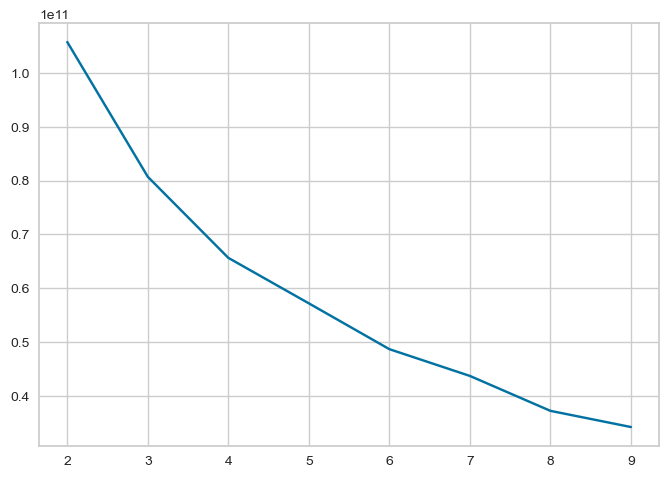

In [40]:
plt.plot(range(2,10),wcss);
# TR = Hemen Yukarıdaki satırda yapılan kodun tablosu.
# EN = Table of the code made in the line just above.

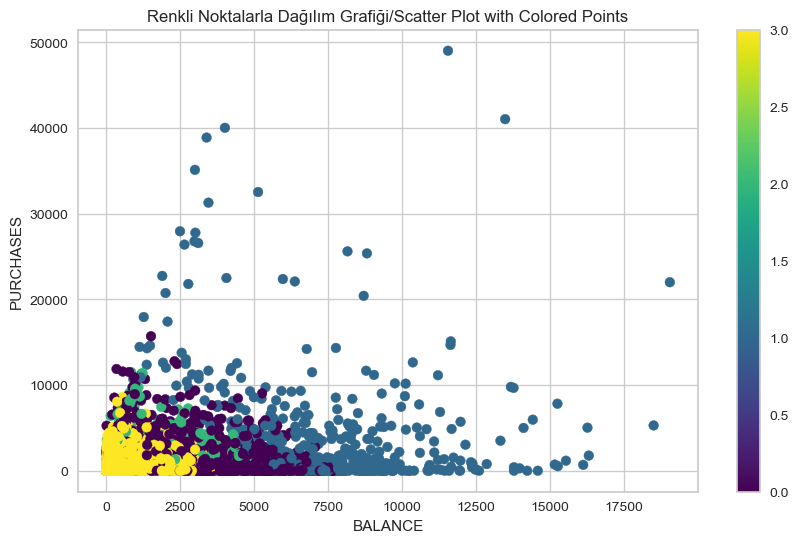

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(x.BALANCE ,x.PURCHASES ,c=pred,cmap='viridis')
# plt.scatter(x.a ,x.b ,c=pred)
# TR = a yerine bir şeyin özelliği. Örnek araba silindirler. b yerine bir şeyin fiyatı.
# EN = A property of something instead of a. Sample car rollers. The price of something instead of b.

# TR = x.a x ekseninde tanımlıyor,x.b y ekseninde tanımlıyor.c=pred kümeleme algoritmasından elde edilen tahmin edilen küme etiketlerini veya sınıflandırma algoritmasından elde edilen sınıf etiketlerini içerir.
# EN = x.a defines on the x-axis, x.b defines on the y-axis.c=pred contains the predicted cluster labels obtained from the clustering algorithm or the class labels obtained from the classification algorithm.

plt.colorbar()
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.title("Renkli Noktalarla Dağılım Grafiği/Scatter Plot with Colored Points");

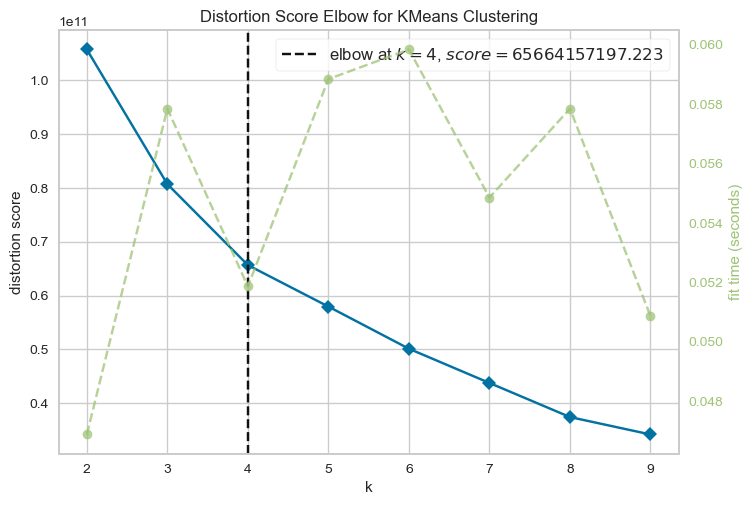

In [41]:
vis=KElbowVisualizer(model,k=(2,10))
# TR = Bu yöntem, özellikle k-means gibi kümeleme algoritmalarında en uygun küme sayısını belirlemek için oldukça faydalıdır.
# EN = This method is especially useful for determining the optimal number of clusters in clustering algorithms such as k-means.
vis.fit(x)
vis.show();

### <font color=#0fffff> Hiyerarşik kümeleme - Hierarchical Clustering

In [42]:
data=linkage(x,method='ward', metric='euclidean')

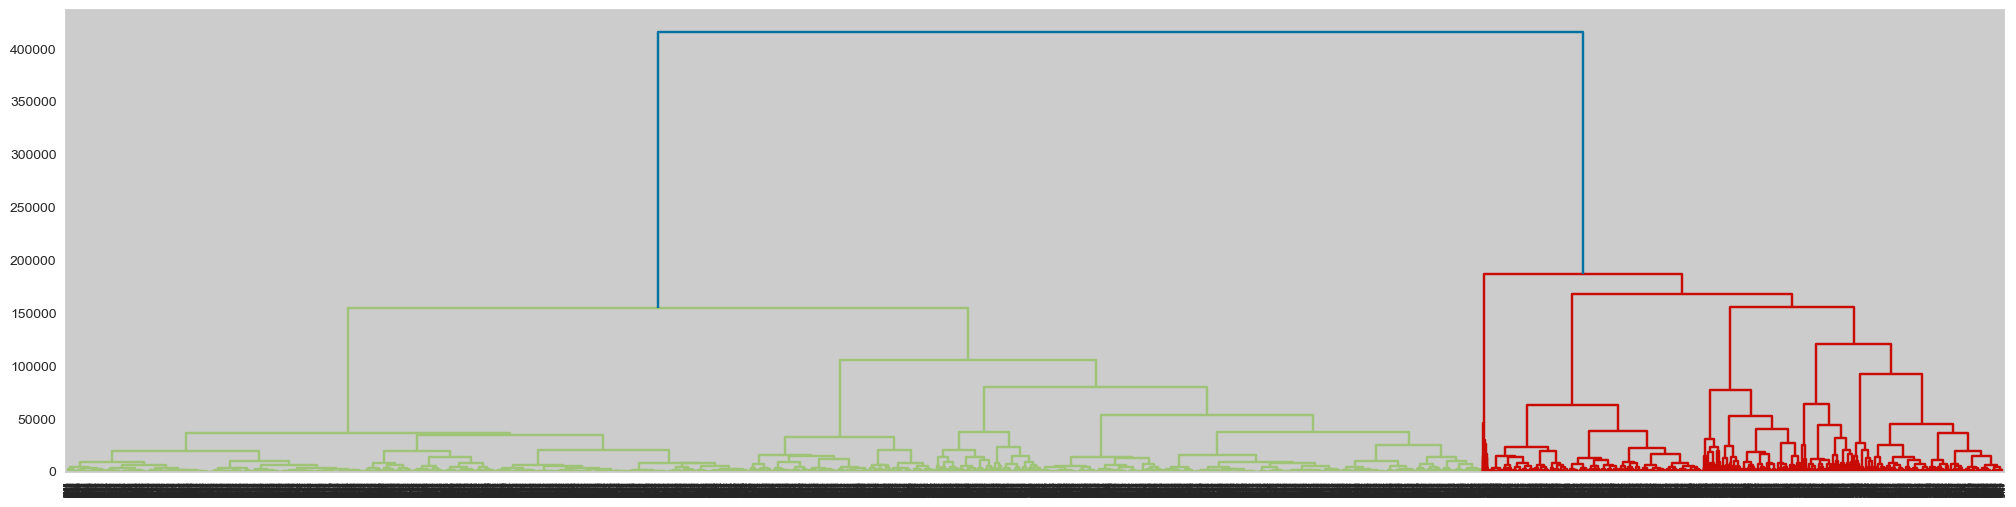

In [43]:
plt.figure(figsize=(25,6))
dendrogram(data);

In [44]:
x['CREDIT_CARD_SEGMENTS']=df['CREDIT_CARD_SEGMENTS']
x

KeyError: 'CREDIT_CARD_SEGMENTS'

In [ ]:
x[['CREDIT_CARD_SEGMENTS','Cluster']]

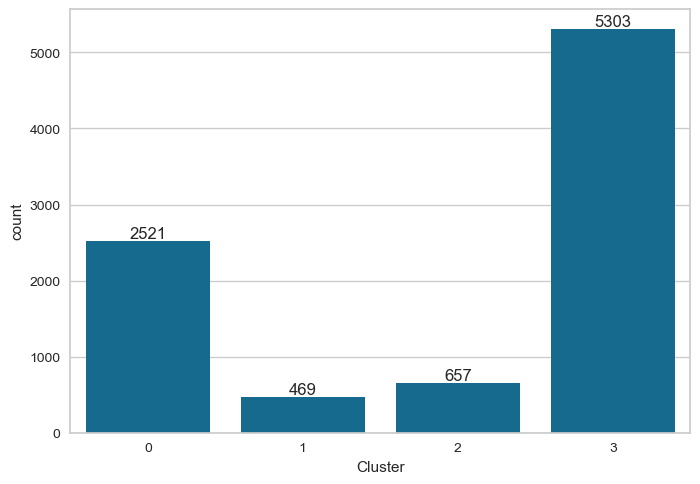

In [45]:
ax=sns.countplot(data=x,x='Cluster')
ax.bar_label(ax.containers[0]);

In [46]:
cols = list(x.columns)
cols.insert(0, cols.pop(cols.index('Cluster')))
x = x[cols]

In [47]:
x[x['Cluster']==0] 
# TR = vis'de çıkan sonuca göre oluşturacağız.
# EN = We will create it according to the result in vis.

,Cluster,BALANCE,PURCHASES,CREDIT_LIMIT
1,0,3202.467416,0.00,7000.0
2,0,2495.148862,773.17,7500.0
3,0,1666.670542,1499.00,7500.0
8,0,1014.926473,861.49,7000.0
13,0,921.693369,2137.93,7500.0
...,...,...,...,...
8757,0,2740.658860,0.00,4000.0
8804,0,1704.571464,0.00,5000.0
8813,0,3335.053583,0.00,7000.0
8839,0,3271.424058,1173.28,5000.0


In [48]:
x[x['Cluster']==1] 

,Cluster,BALANCE,PURCHASES,CREDIT_LIMIT
21,1,6369.531318,6359.95,11250.0
28,1,7152.864372,387.05,10500.0
30,1,12136.219960,3038.01,13000.0
32,1,6732.823064,324.95,10500.0
36,1,7427.076941,0.00,9000.0
...,...,...,...,...
7962,1,13318.659120,3504.74,17500.0
8215,1,4436.557694,6005.90,10500.0
8217,1,5658.669875,740.89,11000.0
8541,1,3326.323283,8209.77,10000.0


In [49]:
x[x['Cluster']==2] 

,Cluster,BALANCE,PURCHASES,CREDIT_LIMIT
6,2,627.260806,7091.01,13500.0
9,2,152.225975,1281.60,11000.0
18,2,1989.072228,504.35,13000.0
23,2,3800.151377,4248.35,9000.0
34,2,3517.101616,547.28,11000.0
...,...,...,...,...
8737,2,2533.618119,5633.83,9000.0
8743,2,40.960739,472.75,13000.0
8769,2,116.581583,1045.14,9000.0
8774,2,2585.246439,338.00,9000.0


In [50]:
x[x['Cluster']==3] 

,Cluster,BALANCE,PURCHASES,CREDIT_LIMIT
0,3,40.900749,95.40,1000.0
4,3,817.714335,16.00,1200.0
5,3,1809.828751,1333.28,1800.0
7,3,1823.652743,436.20,2300.0
10,3,1293.124939,920.12,1200.0
...,...,...,...,...
8945,3,28.493517,291.12,1000.0
8946,3,19.183215,300.00,1000.0
8947,3,23.398673,144.40,1000.0
8948,3,13.457564,0.00,500.0
